# **Predicción de precios de casas**

## **Problema**
Pídale a un comprador de vivienda que describa la casa de sus sueños, y probablemente no comenzaráconlaalturadeltechodelsótanoola proximidadaunferrocarrileste-oeste.Peroel conjunto de datos de esta competencia en el patio de recreo demuestra que influye mucho más en las negociaciones de precios que la cantidad de dormitorios o una valla blanca.

Con 79 variables explicativas que describen (casi) todos los aspectos de las casas residenciales en Ames, Iowa, esta competencia lo desafía a predecir el precio final de cada casa.

## **Objetivo**
Obtener Precios de Casas usando métodos de Boosting Regresión
## **Métrica**
La métrica usada será RMSE

### Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

### Leyendo los archivos csv de train y test

In [2]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

### Seleccionando columnas que tienen mayores celdas vacías para eliminarlas de los datos de train y test

In [3]:
drop_columns = train.isnull().sum()[train.isnull().sum() > train.shape[0]/2]
drop_columns = drop_columns.index.to_list()

In [4]:
train_new = train.drop(drop_columns, axis =1)
test_new = test.drop(drop_columns, axis=1)

In [5]:
train_new.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

<Figure size 2000x1000 with 0 Axes>

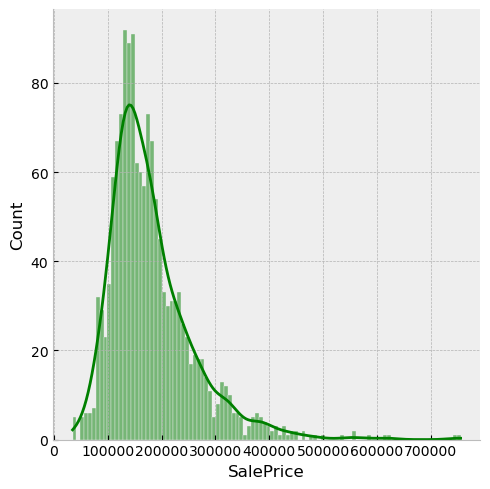

In [6]:
plt.figure(figsize=(20,10))
sns.displot(data=train_new, x='SalePrice', color='g', bins=100, kde=True)
plt.show()

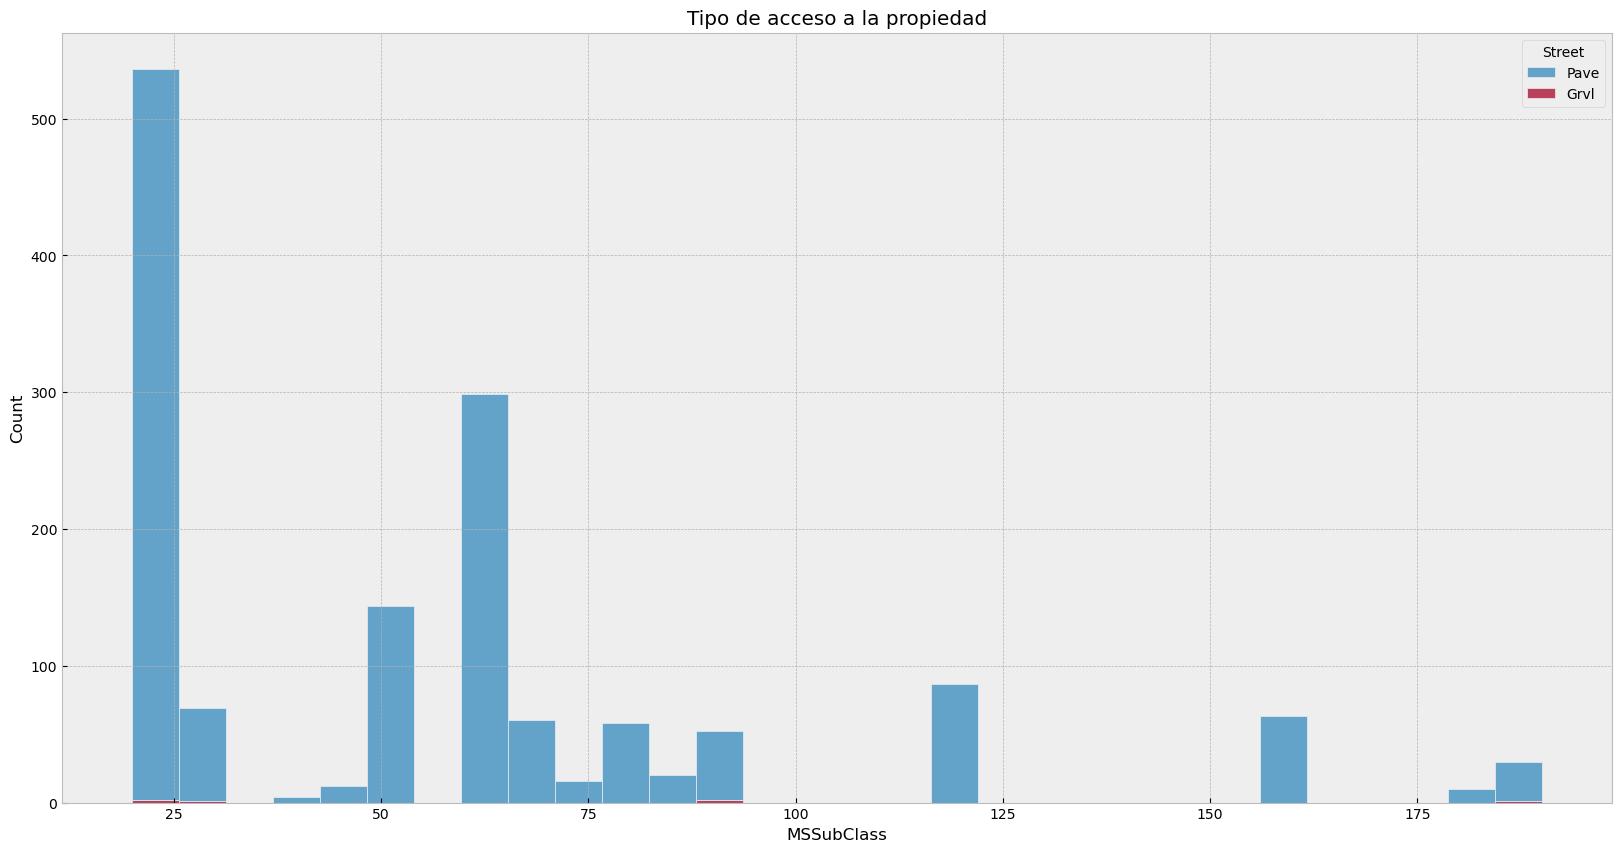

In [7]:
plt.figure(figsize=(20,10))
sns.histplot(data=train_new, x='MSSubClass', hue='Street', bins=30, multiple='stack')
plt.title('Tipo de acceso a la propiedad')
plt.show()

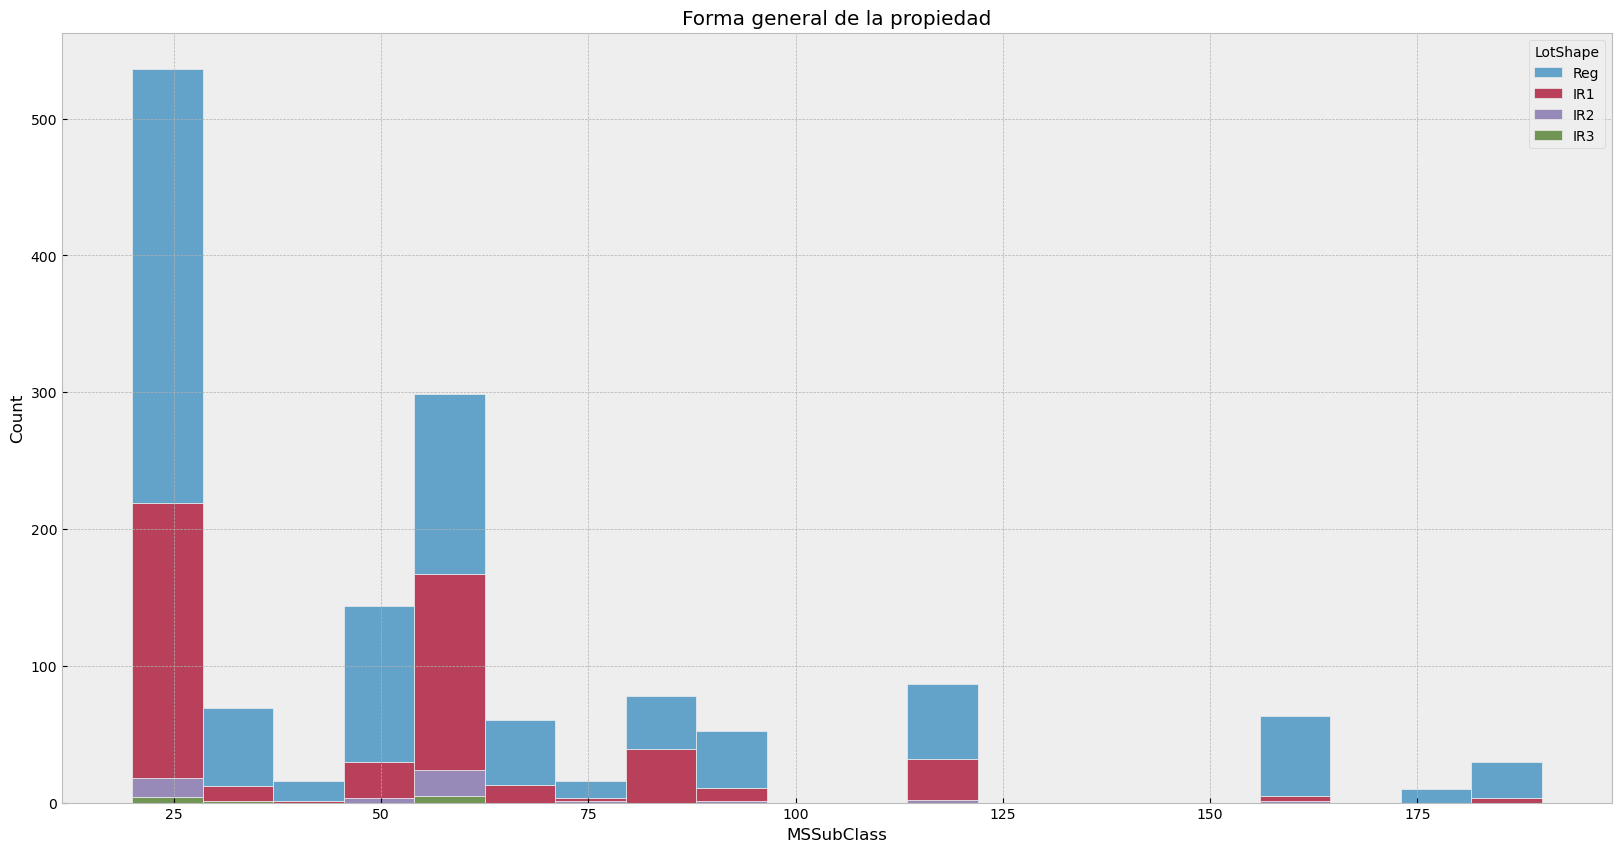

In [8]:
plt.figure(figsize=(20,10))
sns.histplot(data=train_new, x='MSSubClass', hue='LotShape', multiple='stack')
plt.title('Forma general de la propiedad')
plt.show()

In [9]:
train_new['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

### Seleccionando columnas según su tipo de variable

In [10]:
cat = test_new.select_dtypes(include='object').columns.to_list()
num = test_new.select_dtypes(exclude='object').columns.to_list()
num.remove('Id')
target = train_new.columns.to_list()[-1]

### Preprocesando la data

In [11]:
X = train_new[cat + num]
y = train_new[target]

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder 

In [13]:
impute_num = SimpleImputer(strategy='mean')
impute_cat = SimpleImputer(strategy='most_frequent')
impute_num.fit(X[num])
impute_cat.fit(X[cat])
X_num = impute_num.transform(X[num])
X_num = pd.DataFrame(X_num, columns=[num])
X_cat = impute_cat.transform(X[cat])
X_cat = pd.DataFrame(X_cat, columns=[cat])

In [14]:
columns = [X_cat.columns[i] for i in range(len(X_cat.columns))]
for i in range(len(columns)):
    oe = OrdinalEncoder(categories=[[j for j in X_cat[columns[i]].unique()]])
    X_cat[columns[i][0] + "_num"] = oe.fit_transform(X_cat[[columns[i]]])
cat_to_num = X_cat.select_dtypes(exclude='object').columns.to_list()

In [16]:
# X_processed = pd.concat([X_cat, X_num], axis=1)
X_processed = pd.concat([X_cat[cat_to_num], X_num], axis=1)

### Modelando

In [ ]:
data = pd.concat([y, X_processed], axis=1)

In [ ]:
from pycaret.regression import *

In [ ]:
dataset = setup(data = data, 
                target = target,
                session_id = 123,
                silent = True)

In [ ]:
best = compare_models()

In [ ]:
best

In [ ]:
tune_best = tune_model(estimator = best)

In [ ]:
tune_best

In [ ]:
final_model = finalize_model(estimator = tune_best)

In [ ]:
save_model(final_model, '../model/model')

### Predicciones 

In [ ]:
X_test = test_new[num + cat]

In [ ]:
X_test_num = impute_num.transform(X_test[num])
X_test_cat = impute_cat.transform(X_test[cat])
X_test_num = pd.DataFrame(X_test_num, columns = [num])
X_test_cat = pd.DataFrame(X_test_cat, columns = [cat])

In [ ]:
X_test_processed = pd.concat([X_test_cat, X_test_num], axis=1)

In [ ]:
model_load = load_model('../model/model')

In [ ]:
predictions = predict_model(model_load, data=X_test_processed)

In [ ]:
predictions

### Interpretabilidad de modelos con SHAP

In [19]:
import shap
import catboost 
from catboost import *
from sklearn.preprocessing import OrdinalEncoder
shap.initjs()

In [20]:
model = CatBoostRegressor(iterations=300, learning_rate=0.1, random_seed=123)
model.fit(X_processed, y, verbose=False, plot=False)

In [21]:
explainer = shap.TreeExplainer(model)

In [22]:
shap_values = explainer.shap_values(X_processed)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_processed.iloc[0,:])

In [23]:
shap.force_plot(explainer.expected_value, shap_values, X_processed)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


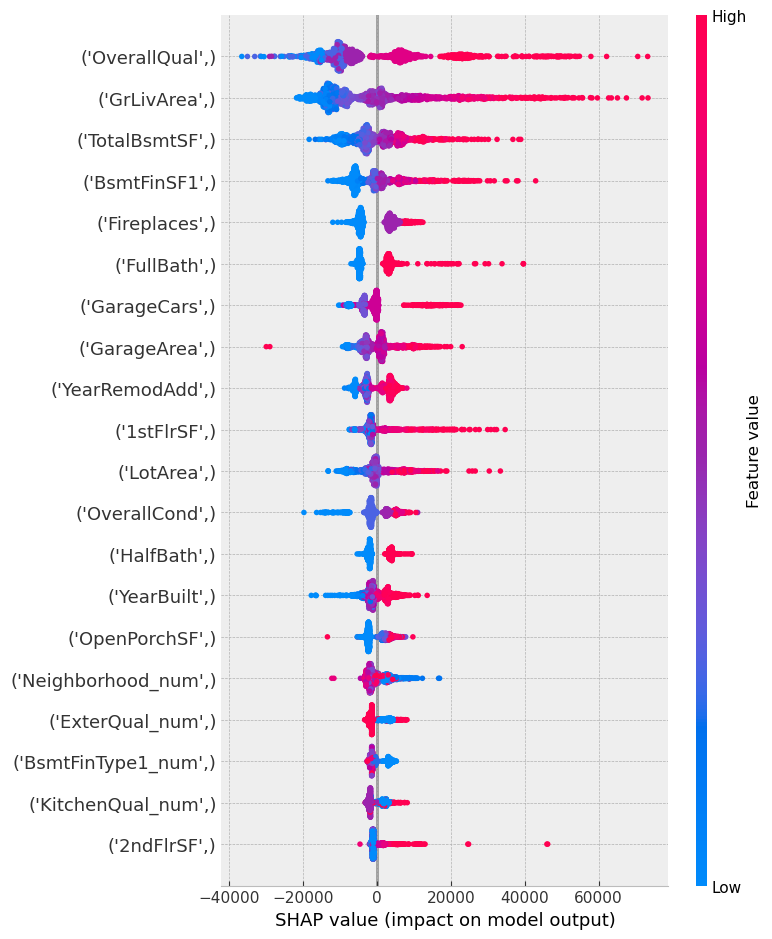

In [24]:
shap.summary_plot(shap_values, X_processed)

Las variables más importantes son:
- OverallQual
- GrLivArea
- TotalBsmtSF
- Fireplaces
- FullBath
- GarageCars
- GarageArea
- YearRemodAdd
- 1stFlrSF
- LotArea
- OverallCond
- HalfBath
- YearBuilt
- OpenPorchSF
- Neighborhood_num
- ExterQual_num
- BsmtFinType1_num
- KitchenQual_num
- 2ndFlrSF